In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report

In [3]:
# Read the cleaned CSV file into a Pandas DataFrame
file_path = Path("Diabetes_Prediction_Clean.csv")
df_diabetes_data = pd.read_csv(file_path)
# Review the DataFrame
df_diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0


In [4]:
df_diabetes_data = pd.get_dummies(df_diabetes_data)

In [5]:
df_diabetes_data.shape

(60180, 13)

In [6]:
# Separate the data into labels and targets

# Separate the y variable, the target
y = df_diabetes_data["diabetes"]

# Separate the X variable, the labels
X = df_diabetes_data.drop(columns= ["diabetes"])

In [7]:
# Review the y variable Series
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
60175    0
60176    0
60177    0
60178    0
60179    0
Name: diabetes, Length: 60180, dtype: int64


In [8]:
# Review the X variable DataFrame
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,1
1,28.0,0,0,27.32,5.7,158,0,1,0,0,0,1
2,36.0,0,0,23.45,5.0,155,1,0,0,1,0,0
3,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0
4,20.0,0,0,27.32,6.6,85,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
60175,26.0,0,0,34.34,6.5,160,1,0,0,0,0,1
60176,40.0,0,0,40.69,3.5,155,1,0,0,0,0,1
60177,66.0,0,0,27.83,5.7,155,0,1,0,0,1,0
60178,24.0,0,0,35.42,4.0,100,1,0,0,0,0,1


In [9]:
# Check the balance of our target values
y.value_counts()

0    53606
1     6574
Name: diabetes, dtype: int64

In [10]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=1,
                                                   stratify=y)

In [11]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=2000)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=1)

In [12]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
results.head()

,Prediction,Actual
10326,1,1
46877,0,0
57182,1,1
53522,0,0
48405,0,0


In [13]:
# Print the balanced_accuracy score of the model
balanced_accuracy = balanced_accuracy_score(y_test, predictions)
print(f"Balanced Accuracy Score : {balanced_accuracy}")

Balanced Accuracy Score : 0.8181705717570918


In [14]:
# Generate a confusion matrix for the model
c_matrix = confusion_matrix(y_test, predictions)
c_matrix_df = pd.DataFrame(
    c_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

print("Confusion Matrix")
display(c_matrix_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,13231,170
Actual 1,577,1067


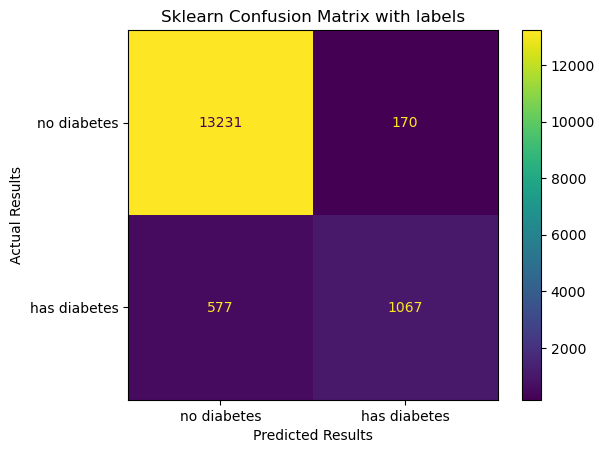

In [15]:
# Visual the Confusion Matrix using ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cmd_obj = ConfusionMatrixDisplay(c_matrix, display_labels=['no diabetes', 'has diabetes'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels', 
                xlabel='Predicted Results', 
                ylabel='Actual Results')
plt.show()

In [16]:
# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     13401
           1       0.86      0.65      0.74      1644

    accuracy                           0.95     15045
   macro avg       0.91      0.82      0.86     15045
weighted avg       0.95      0.95      0.95     15045



In [17]:
# Print accuracy report for Confusion Matrix
print("Accuracy Score")
print(accuracy_score(y_test, predictions))

Accuracy Score
0.9503489531405782


# Oversampling Method

In [18]:
#########Oversampling Method##################:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Initiating random oversampler model:
## assigning random state one to the model:
ros = RandomOverSampler(sampling_strategy= .3, random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)

In [19]:
# Counting the distinct values of resampled labels:
y_resampled.value_counts()


0    40205
1    12061
Name: diabetes, dtype: int64

In [20]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_ros = LogisticRegression(solver = 'lbfgs',
                                 max_iter = 200,
                                 random_state = 1
                                )

# Fit the model using the resampled training data
classifier_ros.fit(X_resampled, y_resampled)


# Prediction code
predictions_ros = classifier_ros.predict(X_resampled)
results_ros = pd.DataFrame({'Predictions': predictions, 'Actual': y_test}).reset_index(drop = True)
results_ros.head(10)


/Users/danielacastellon/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predictions,Actual
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [21]:
# Printing accuracy score
accuarcy_ros = accuracy_score(y_resampled, predictions_ros)
accuarcy_ros

0.9088126124057705

In [25]:
# Printing balanced accuracy score
balanced_accuarcy_ros = balanced_accuracy_score(y_resampled, predictions_ros)
balanced_accuarcy_ros

0.8468501384595144

In [45]:
# Confusion Matrix
cm_ros = confusion_matrix(y_resampled, predictions_ros)

cm_df_ros = pd.DataFrame(
    cm_ros, index = ['Actual 0 ', 'Actual 1'], columns = ['Predicted 0','Predicted 1']
)

cm_df_ros

,Predicted 0,Predicted 1
Actual 0,38674,1531
Actual 1,3235,8826


In [26]:
# Print classification report
print(classification_report(y_resampled, predictions_ros))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     40205
           1       0.85      0.73      0.79     12061

    accuracy                           0.91     52266
   macro avg       0.89      0.85      0.86     52266
weighted avg       0.91      0.91      0.91     52266



# Coefficient weights- Oversampling model

In [47]:
# Coefficient weights- Oversampling model
from sklearn.linear_model import LogisticRegression

# Creating array for model weights
coeff = classifier_ros.coef_[0]
absolute_coefficients = abs(coeff)

In [48]:
# Checking Variable
absolute_coefficients

array([0.05054044, 0.71937655, 0.7734413 , 0.08603421, 2.11095974,
       0.03179278, 6.82513667, 6.48822019, 0.06378456, 4.27231695,
       4.56763507, 4.5371894 ])

In [52]:
# Creating array for column names
Column_name = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_former',
       'smoking_history_never']

# Matching coefficients with weights
feature_coefficients = list(zip(Column_name, coeff))
feature_coefficients.sort(key=lambda x: x[1], reverse=True)
feature_coefficients

[('HbA1c_level', 2.11095973706004),
 ('heart_disease', 0.7734412979679742),
 ('hypertension', 0.719376548400295),
 ('bmi', 0.08603420839224481),
 ('age', 0.05054043989898677),
 ('blood_glucose_level', 0.031792776199683896),
 ('gender_Other', -0.06378455686366319),
 ('smoking_history_current', -4.272316949642752),
 ('smoking_history_never', -4.537189399899446),
 ('smoking_history_former', -4.5676350730312185),
 ('gender_Male', -6.488220193927408),
 ('gender_Female', -6.825136671786353)]

In [57]:
# Converting to dataframe
coefficient_dataframe = pd.DataFrame(feature_coefficients, columns= ["Risk Factor", "Coefficient Value"])
coefficient_dataframe

,Risk Factor,Coefficient Value
0,HbA1c_level,2.110960
1,heart_disease,0.773441
2,hypertension,0.719377
3,bmi,0.086034
4,age,0.050540
5,blood_glucose_level,0.031793
6,gender_Other,-0.063785
7,smoking_history_current,-4.272317
8,smoking_history_never,-4.537189
9,smoking_history_former,-4.567635


In [50]:
# Printing results
for feature, coefficient in feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {round(coefficient,2)}")

Feature: HbA1c_level, Coefficient: 2.11
Feature: heart_disease, Coefficient: 0.77
Feature: hypertension, Coefficient: 0.72
Feature: bmi, Coefficient: 0.09
Feature: age, Coefficient: 0.05
Feature: blood_glucose_level, Coefficient: 0.03
Feature: gender_Other, Coefficient: -0.06
Feature: smoking_history_current, Coefficient: -4.27
Feature: smoking_history_never, Coefficient: -4.54
Feature: smoking_history_former, Coefficient: -4.57
Feature: gender_Male, Coefficient: -6.49
Feature: gender_Female, Coefficient: -6.83


# Coefficient weights- Regression Model

In [51]:
# Repeated steps for standard logistic regression model 
coeff_standard = classifier.coef_[0]
absolute_coefficients_standard = abs(coeff_standard)


Column_name = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_former',
       'smoking_history_never']

feature_coefficients = list(zip(Column_name, coeff_standard))
feature_coefficients.sort(key=lambda x: x[1], reverse=True)

feature_coefficients


[('HbA1c_level', 2.3167356114742623),
 ('hypertension', 0.7068828164109537),
 ('heart_disease', 0.6500415091812977),
 ('gender_Male', 0.2567062443868757),
 ('smoking_history_current', 0.10759214597771306),
 ('bmi', 0.08590166753434143),
 ('age', 0.04922889113535609),
 ('blood_glucose_level', 0.03304305250038741),
 ('gender_Female', -0.04362356135550305),
 ('smoking_history_never', -0.04892348024230886),
 ('smoking_history_former', -0.05971359479789902),
 ('gender_Other', -0.21412761213622897)]